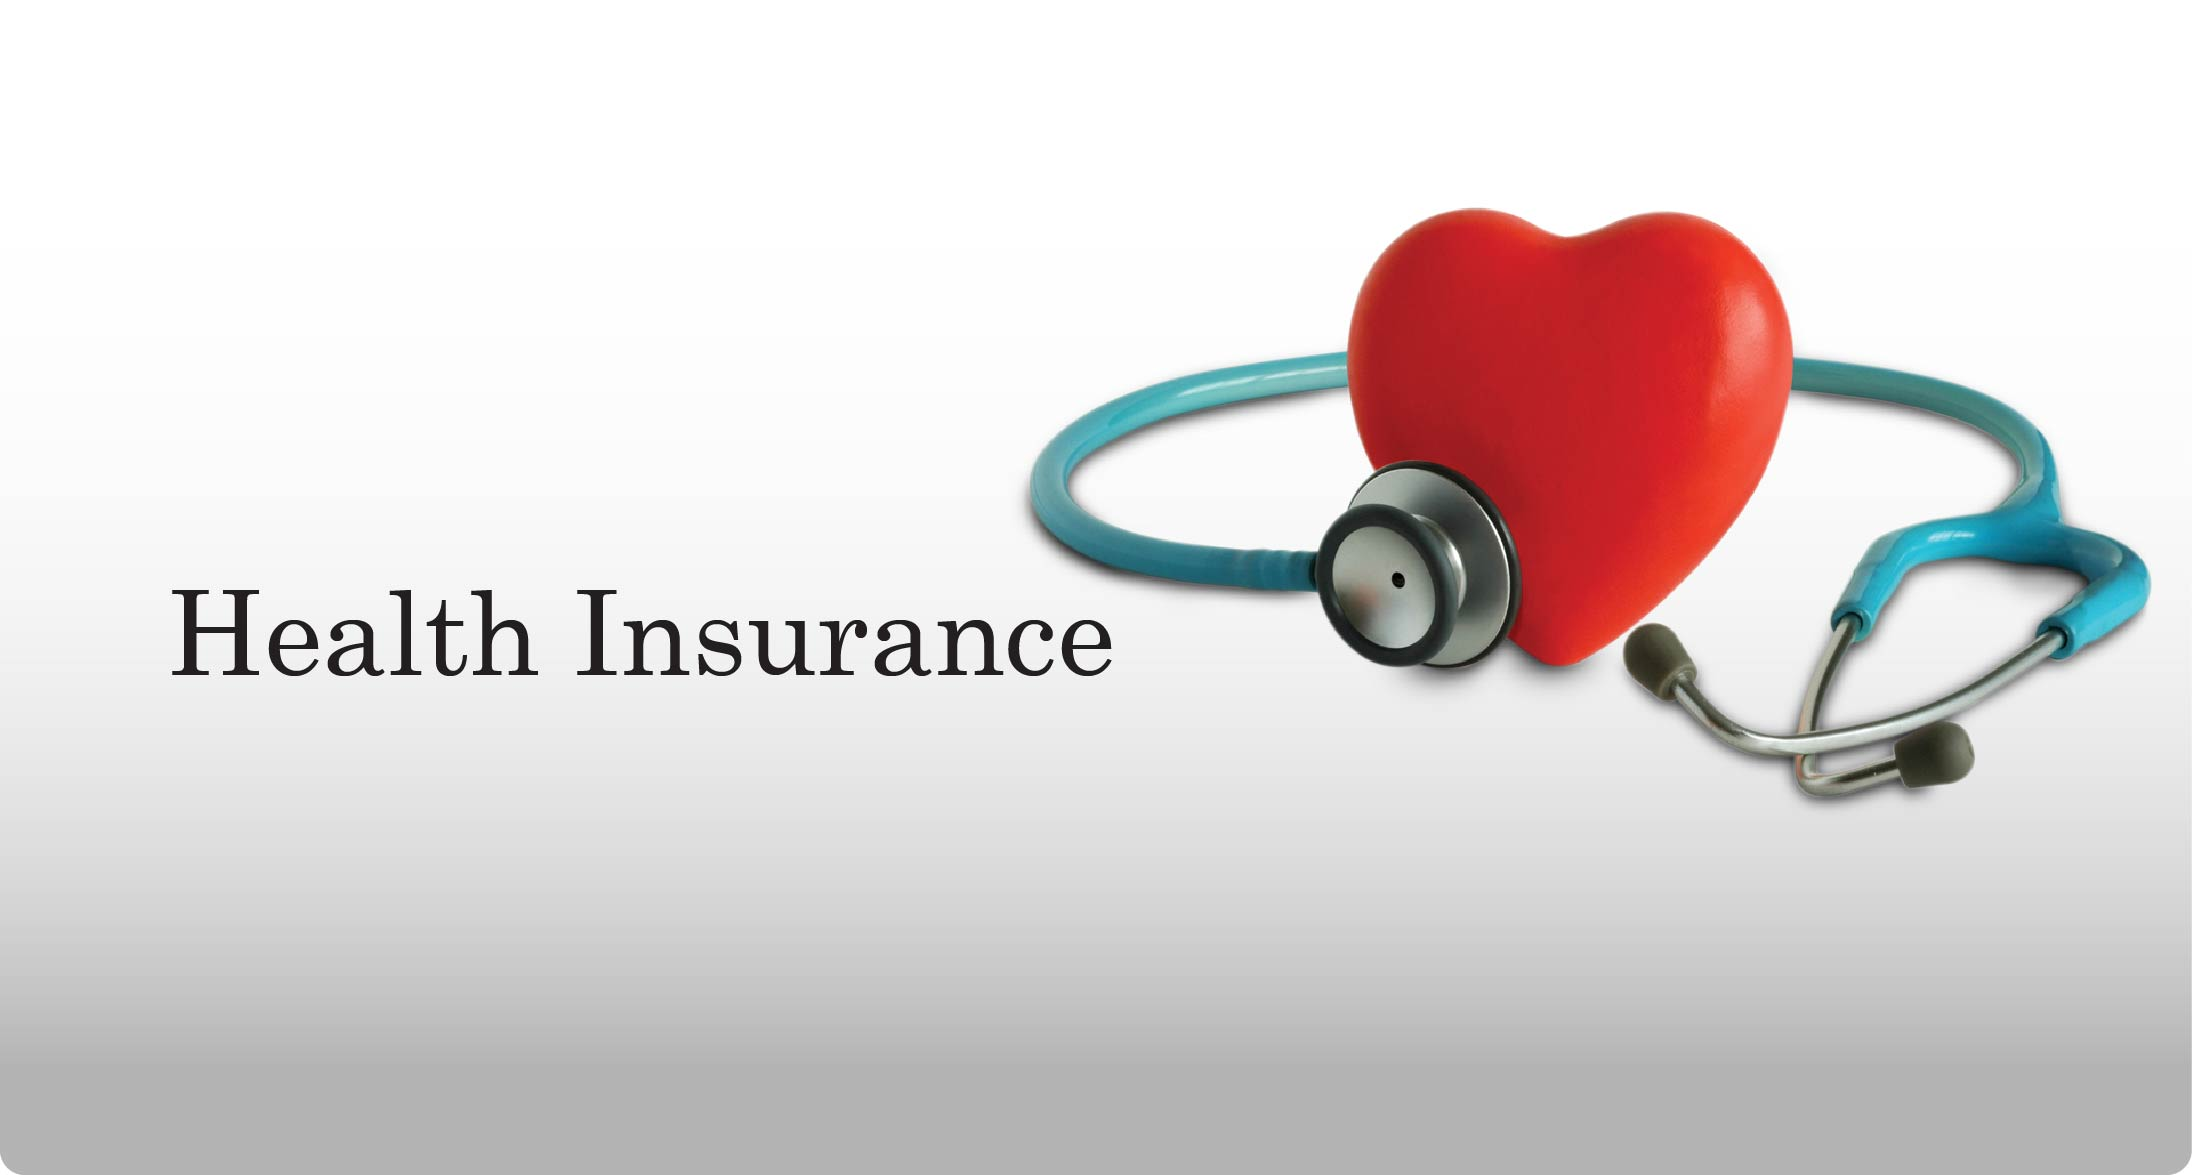



# <font color = 'Red'> Title :- Health Insurance Premium Prediction </font>

#### <font color = 'Blue'> By - Nilesh Shashikant Patil </font>
#### <font color = 'Blue'> Roll No : 21MAT210 </font>



# Task 1:- 1) Problem Statement

The insurance premium prediction problem includes modeling existing expenses of the clients which is based on their physical & medical conditions. This model is then used to predict future expense of the client.

## 2) Problem Objective

The aim of this project to predict future medical expenses of individuals based on their physical and family conditions of the clients, location and their existing medical expenses , that will help medical insurance company to make on charging the premium.

## 3) About the dataset

* 1) age :- Age of the client
* 2) sex :- Gender of the client
* 3) bmi :- Bmi(body mass index) of the client
* 4) children :- Number of childrens
* 5) smoker :- Whether client smokes or not
* 6) expenses :- Premium of the insurance

**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

**Import the dataset**

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/nsp2720/ML_insurance/main/insurance%20(4).csv")

# Task 2 :- Data Exploration and Validation

## 1) Basic details of the data

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


There are 7 columns in the dataset means we have 7 features in the datset.

**Note** :- "expenses" is the target variable

In [ ]:
# To check number of unique values in each feature in the dataset
insurance.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [ ]:
# To get the more information about datatypes in the dataset.
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# To get the general information about the dataset.
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# To get the number of rows and columns in the dataset(Dimensions)
insurance.shape

(1338, 7)

In [ ]:
# To check number of null values in the dataset:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

From this we can see that there are no null values in the datset.

**Observations** :-
1) There are 7 variables(features) and 1338 observations.

2) In the dataset there are no null values.

3) There are 3 variables are 'object' type , and 2 varibles are of 'float' type and 2 variables are of 'int' type.

In [ ]:
# To get the names of the column.
insurance.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'],
      dtype=object)

In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

**Observations**
1) 'age' = 'Discrete variable'

2) 'sex' = 'Categorical Variable'

3) 'bmi' = 'continouse variable'

4) 'children' = 'Discrete variable'

5) 'smoker' = 'Categorical variable'

6) 'region' = 'Categorical variable'

7) 'expenses' = ' Continouse variable'

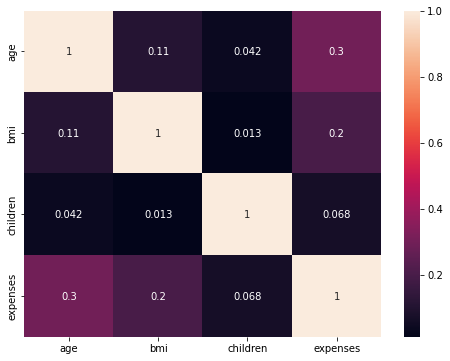

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(insurance.corr(),annot=True)
plt.show()

correlation is a simple measure that quantifies the strength of association between given any two numerical features.

____

## 2) Categorical/Discrete Variable exploration

Generally In this we have to make frequency table for each categorical/discrete column and countplot for that column.

**Frequency Table :** Counts cross-tabulation frequencies for especially for categorical , discrete and class fields.

Frequencies helps us understanding the variable by looking at the values it is taking and data count at each value.

#### 1) Age

In [ ]:
# frequency table for 'Age' variable
insurance['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

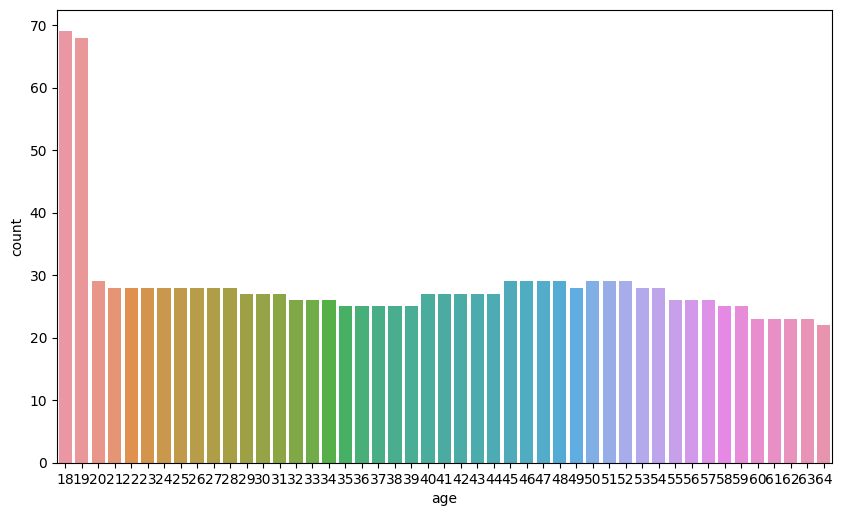

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='age',data=insurance)
plt.show()

**Observation** :-From the countplot we can see that the people who has age 18 & 19 , they have taken insurance more as compare to others.

#### 2) sex

In [ ]:
# To count number of persons in each gender(Frequency Table)
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

There are 676 male and 662 female.

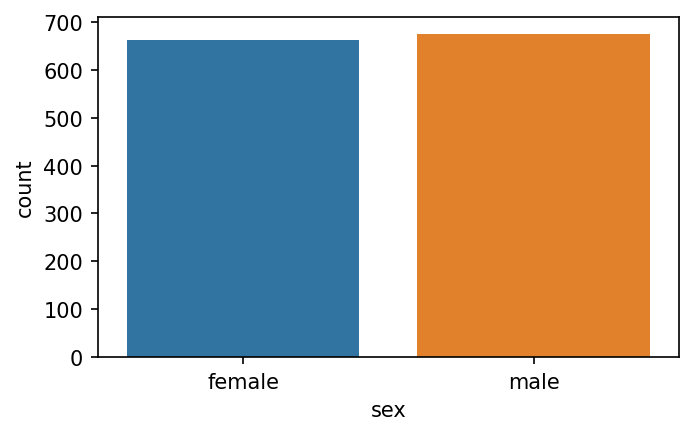

In [ ]:
# Countplot for 'sex' variable
plt.figure(figsize=(5,3),dpi=150)
sns.countplot(x='sex',data=insurance)
plt.show()

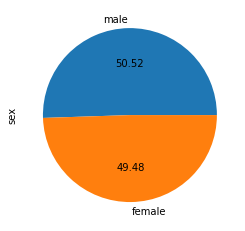

In [ ]:
insurance['sex'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

There are no outliers and null values

In [ ]:
insurance['sex']=insurance['sex'].apply(lambda x: 1 if x=="male" else 0)
insurance['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

1 - male 0 - female

#### 3)children

In [ ]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

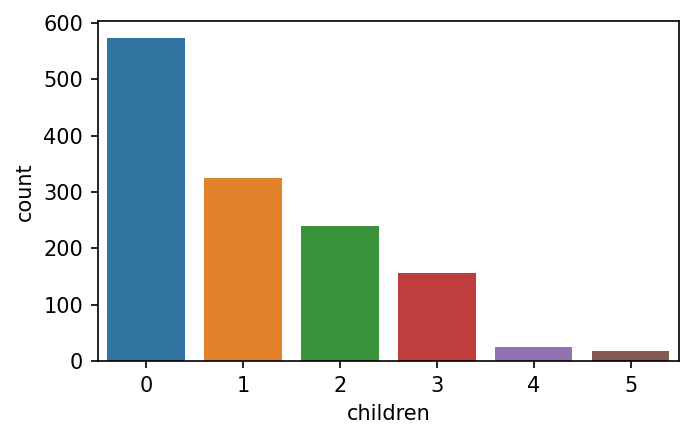

In [ ]:
plt.figure(figsize=(5,3),dpi=150)
sns.countplot(x='children',data=insurance)
plt.show()

In [ ]:
sum(insurance['children'] == 4)

25

In [ ]:
sum(insurance['children'] == 5)

18

#### 4) smoker

In [ ]:
# To count number of persons who smokes
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are 1064 people who not smokes.

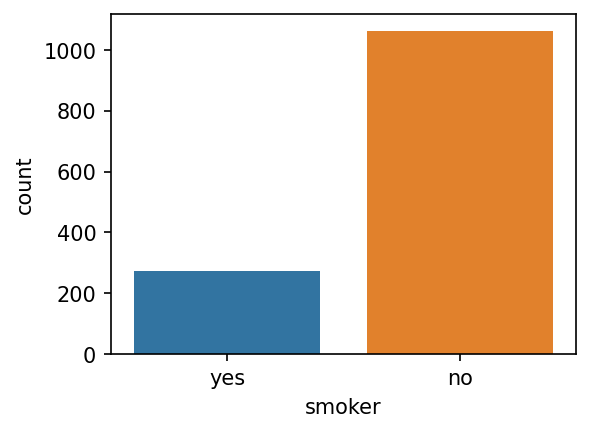

In [ ]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x = 'smoker',data=insurance)
plt.show()

**Observations** :- 1) smoker people are less in number as compare to non-smoker.

In [ ]:
insurance['smoker'] = insurance['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
insurance['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

#### 5) Region

In [ ]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

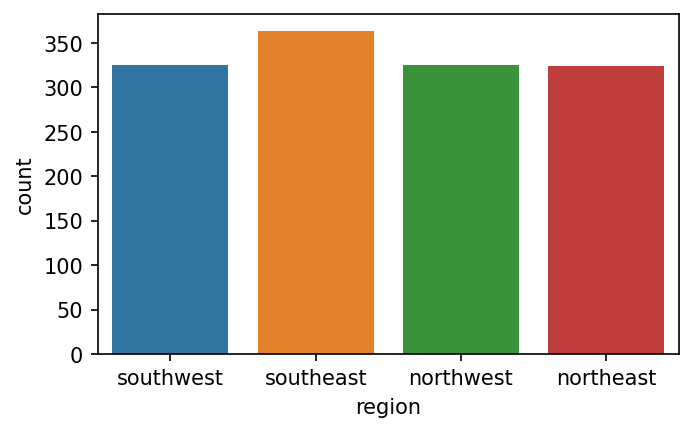

In [ ]:
plt.figure(figsize=(5,3),dpi=150)
sns.countplot(x = 'region' , data=insurance)
plt.show()

_____

## 3) Continouse variable **exploration**

To Explore Continouse variable we will use quantile function and boxplot.

Expected limit for quantile function is [0,1]

Boxplot helps us to get an idea  on the data distribution.

### 1) Bmi

In [ ]:
insurance['bmi'].describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [ ]:
util_percentiles=insurance['bmi'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00])
round(util_percentiles,2)

0.10    23.00
0.25    26.30
0.50    30.40
0.75    34.70
0.80    35.90
0.90    38.63
0.91    39.17
0.92    39.50
0.93    39.84
0.94    40.38
0.95    41.10
0.96    41.80
0.97    42.49
0.98    43.93
0.99    46.39
1.00    53.10
Name: bmi, dtype: float64

*   From the quantile function we get to know that almost 100% data is below 53.10 bmi.

* How to Interprit quantile function :  We can see that 0.10% data is below bmi 23 , Likewise 0.20% data is below bmi 26.30,
.
.
.
95% data is below bmi 41.10





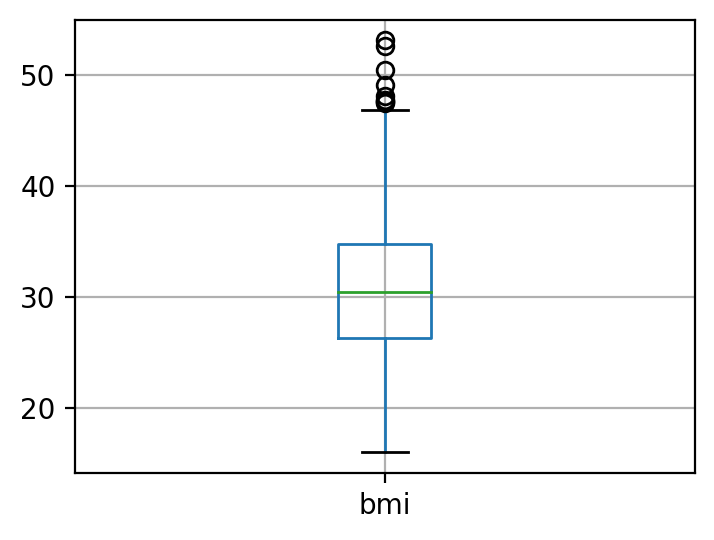

In [ ]:
plt.figure(figsize=(4,3),dpi=200)
insurance.boxplot(column='bmi')

**Observations** :- By looking at boxplot of bmi we can see that There are some outliers in the bmi column.

<Figure size 1000x600 with 0 Axes>

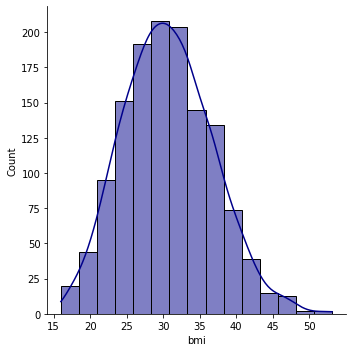

In [ ]:
plt.figure(figsize=(5,3),dpi=200)
sns.displot(insurance['bmi'],bins=15,color='darkblue',kde=True)
plt.show()

### 2)expenses

In [ ]:
insurance['expenses'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

In [ ]:
util_percentiles_1=insurance['expenses'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00])
round(util_percentiles_1,2)

0.10     2346.54
0.25     4740.29
0.50     9382.03
0.75    16639.92
0.80    20260.63
0.90    34831.72
0.91    36212.25
0.92    37489.37
0.93    38765.36
0.94    39863.96
0.95    41181.83
0.96    42915.61
0.97    44492.86
0.98    46676.19
0.99    48537.48
1.00    63770.43
Name: expenses, dtype: float64

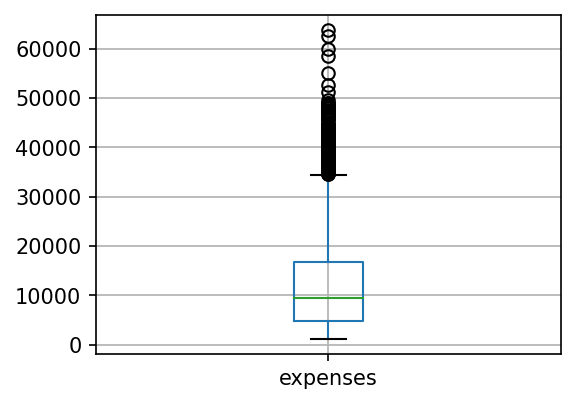

In [ ]:
plt.figure(figsize=(4,3),dpi=150)
insurance.boxplot(column='expenses')
plt.show()

<Figure size 1000x600 with 0 Axes>

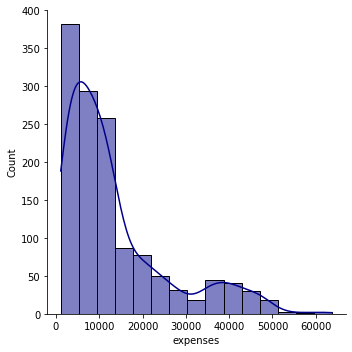

In [ ]:
plt.figure(figsize=(5,3),dpi=200)
sns.displot(insurance['expenses'],bins=15,color='darkblue',kde=True)
plt.show()

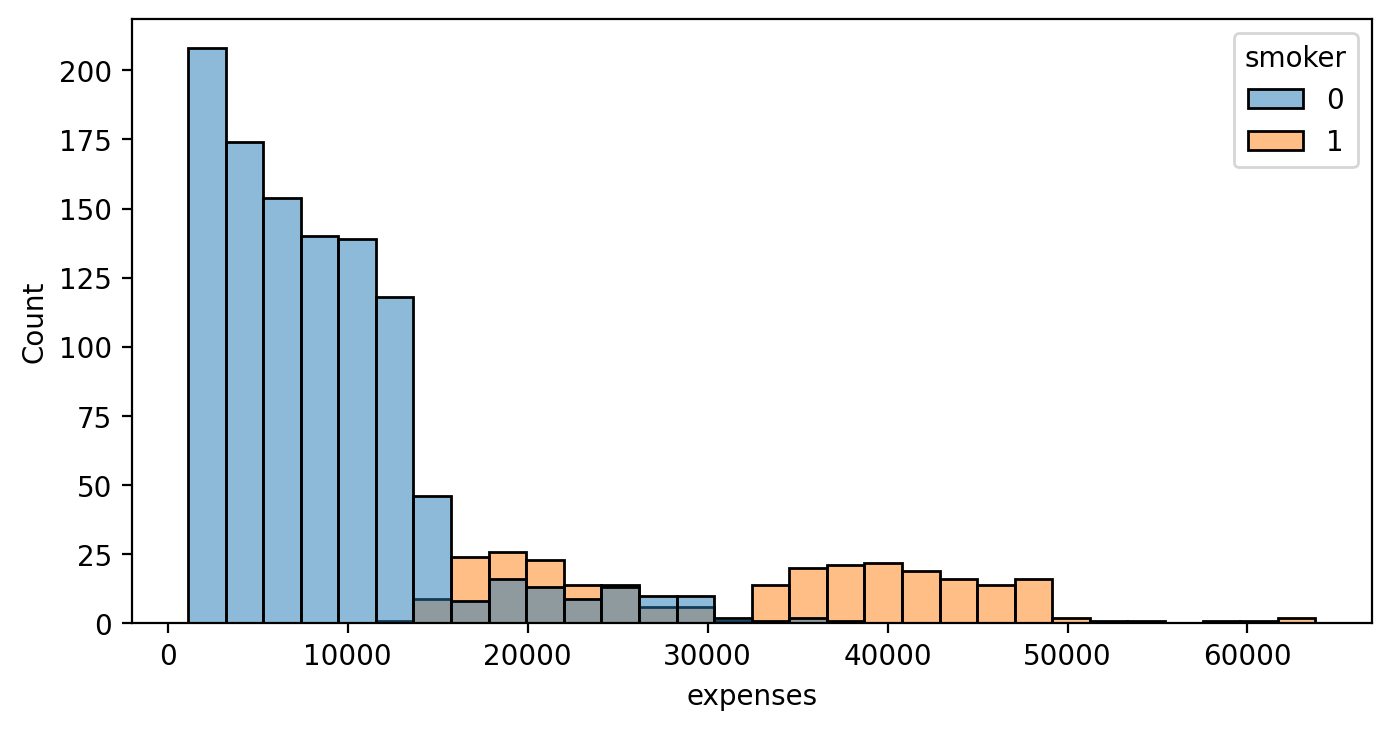

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(data=insurance, x='expenses', hue='smoker')
plt.show()

**Observations :-** From this graph we can see that, people who smokes have more expenses.

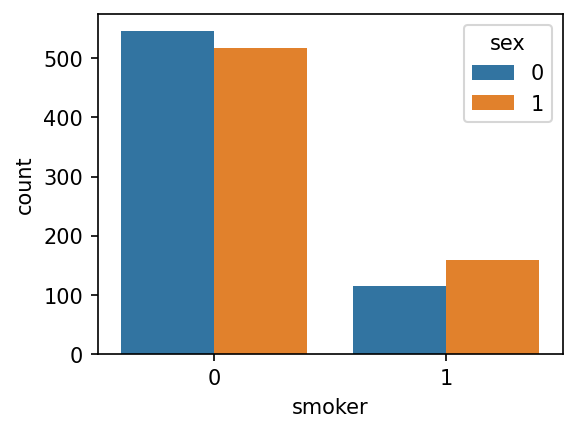

In [ ]:
# Visualize by smoker by sex
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x=insurance.smoker, hue=insurance.sex)
plt.show()

Yes - 1
No - 0

**Observations :-**Most of the people do not smoke

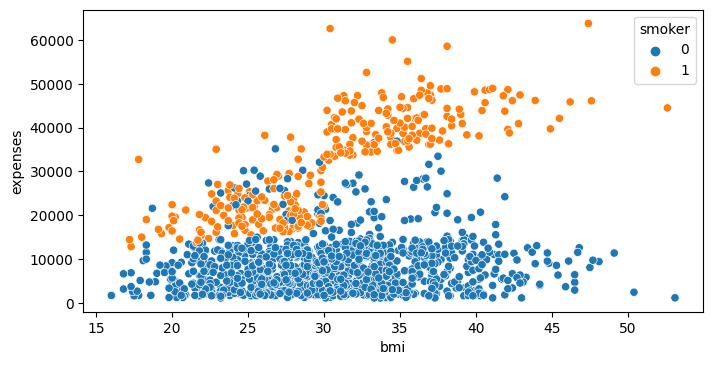

In [ ]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(x=insurance.bmi, y=insurance.expenses,hue=insurance.smoker )
plt.show()

_____

#Task 3 :- Data Cleaning

## 1) bmi

In [ ]:
median_bmi = insurance['bmi'].median()
median_bmi

30.4

In [ ]:
bmi_out = insurance['bmi']>46.39

insurance['bmi_new'] = insurance['bmi']
insurance['bmi_new'][bmi_out] = median_bmi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
insurance = insurance.drop(['bmi'],axis=1)

In [ ]:
insurance.head()

,age,sex,children,smoker,region,expenses,bmi_new
0,19,0,0,1,southwest,16884.92,27.9
1,18,1,1,0,southeast,1725.55,33.8
2,28,1,3,0,southeast,4449.46,33.0
3,33,1,0,0,northwest,21984.47,22.7
4,32,1,0,0,northwest,3866.86,28.9


In [ ]:
# percentile distribution for the new variable
util_percentiles_2=insurance['bmi_new'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00])
round(util_percentiles_2,2)

0.10    23.00
0.25    26.30
0.50    30.40
0.75    34.40
0.80    35.66
0.90    38.20
0.91    38.60
0.92    39.10
0.93    39.50
0.94    39.80
0.95    40.31
0.96    41.00
0.97    41.79
0.98    42.43
0.99    43.90
1.00    46.20
Name: bmi_new, dtype: float64

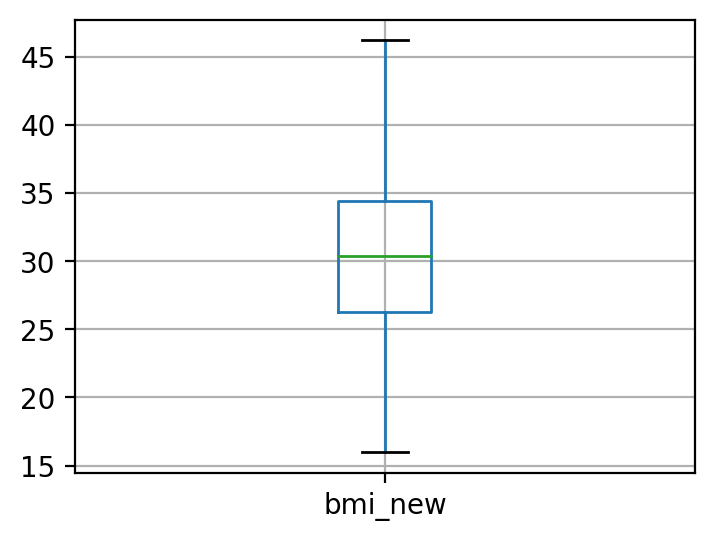

In [ ]:
plt.figure(figsize=(4,3),dpi=200)
insurance.boxplot(column='bmi_new')
plt.show()

Now we can see that there are no multipliers.

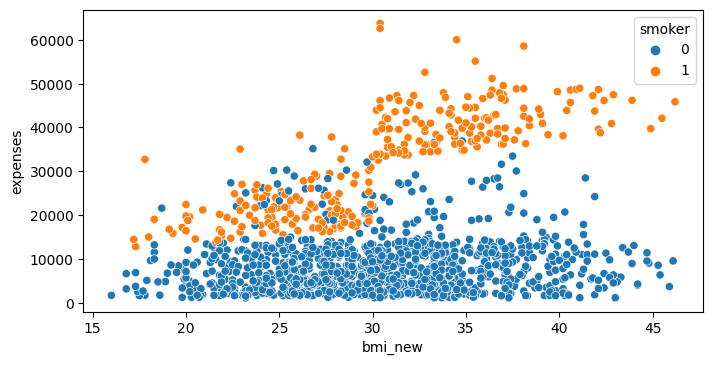

In [ ]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(x=insurance.bmi_new, y=insurance.expenses,hue=insurance.smoker )
plt.show()

____

# Task 4: Model Building Simple Models

#### 1) Linear Regression

In [ ]:
linear_model = sm.ols(formula='expenses ~ age+sex+bmi_new+children+smoker',data = insurance)
fitted = linear_model.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     797.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        06:54:30   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.244e+04    980.590    -12.690      0.0

**Observations :-** From the table we can see that 'sex' column is not impactful because it has p value 0.768 which is more than 0.05 .
So, need to drop this column form the model.

In [ ]:
 linear_model = sm.ols(formula='expenses ~ age+bmi_new+children+smoker',data = insurance)
fitted = linear_model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     997.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        06:54:31   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.248e+04    970.926    -12.857      0.0

**Observations :-**

1.   All variables are impactful now . all variables have p value is less than 0.05

2.   For a good model we want R^2 value and adjusted R^2 value should be nearly equal.So here, are nearly about equal & that should be greator than 0.8




In [ ]:
#Code for VIF Calculation

def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
#Calculating VIF values using that function
X_Data=insurance.drop(["region"],axis=1)
vif_cal(input_data=X_Data)

age  VIF =  1.37
sex  VIF =  1.01
children  VIF =  1.01
smoker  VIF =  3.53
expenses  VIF =  3.99
bmi_new  VIF =  1.12


**Observation :-**We can see that all the variables are independent means VIF of all variables is less than 5 . means there is no multicollinearity.

*So,no need to drop any variable*

Build a new linear regression model with all impactful variables.

In [ ]:
linear_model = sm.ols(formula='expenses ~ age+children+smoker+bmi_new',data = insurance)
fitted = linear_model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     997.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        06:54:31   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.248e+04    970.926    -12.857      0.0

In [ ]:
features = ['age', 'children', 'smoker', 'bmi_new']

X = insurance[features]   # Predictors

y = insurance['expenses']  # Response

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,children,smoker,bmi_new
560,46,2,0,20.0
1285,47,0,0,24.3
1142,52,0,0,24.9
969,39,5,0,34.3
486,54,3,0,21.5
...,...,...,...,...
1095,18,4,0,31.4
1130,39,5,0,23.9
1294,58,0,0,25.2
860,37,2,1,30.4


In [ ]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

# Task 4 :- Feature Enginearing

#### 1) One-Hot encoding

In [ ]:
# To get dummy variables:
one_hot_data = pd.get_dummies(insurance['region'])
print("one_hot_data \n" , one_hot_data.sample(10))

one_hot_data 
       northeast  northwest  southeast  southwest
1129          0          0          0          1
1221          0          0          1          0
416           0          0          1          0
774           0          1          0          0
932           0          0          0          1
957           0          1          0          0
210           0          0          0          1
1001          0          0          0          1
975           1          0          0          0
853           1          0          0          0


In [ ]:
insurance_new = pd.concat([insurance,one_hot_data],axis=1)
insurance_new = insurance_new.drop(['region'],axis=1)
insurance_new.head()

,age,sex,children,smoker,expenses,bmi_new,northeast,northwest,southeast,southwest
0,19,0,0,1,16884.92,27.9,0,0,0,1
1,18,1,1,0,1725.55,33.8,0,0,1,0
2,28,1,3,0,4449.46,33.0,0,0,1,0
3,33,1,0,0,21984.47,22.7,0,1,0,0
4,32,1,0,0,3866.86,28.9,0,1,0,0


_____

# Task 5 :- Updated Model Building.

#### 1) Linear Regression

In [ ]:
insurance_new.columns

Index(['age', 'sex', 'children', 'smoker', 'expenses', 'bmi_new', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [ ]:
updated_linear_model = sm.ols(formula='expenses ~ age+bmi_new+children+smoker+northeast+northwest+southeast+southwest',data = insurance_new)
fitted = updated_linear_model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     571.9
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        06:54:31   Log-Likelihood:                -13549.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.03e+04    795.194    -12.956      0.0

In [ ]:
#Calculating VIF values using that function
vif_cal(input_data=insurance_new)

age  VIF =  1.37
sex  VIF =  1.01
children  VIF =  1.01
smoker  VIF =  3.54
expenses  VIF =  4.01
bmi_new  VIF =  1.21
northeast  VIF =  inf
northwest  VIF =  inf
southeast  VIF =  inf
southwest  VIF =  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


**Observations :-**We can see that four variables have vif value is greator than 5 so there is high multicollinearity. So no need to remove all the features , first drop anyone among them then check vif . remaining values will change automatically.

*Suppose we have 2/3 variables having vif greator than 5 , then dont remove all that features . first remove variable which has highest vif value then check.*

In [ ]:
#Calculating VIF values using that function
insurance_new1=insurance_new.drop(["northeast"],axis=1)
vif_cal(input_data=insurance_new1)

age  VIF =  1.37
sex  VIF =  1.01
children  VIF =  1.01
smoker  VIF =  3.54
expenses  VIF =  4.01
bmi_new  VIF =  1.21
northwest  VIF =  1.52
southeast  VIF =  1.64
southwest  VIF =  1.53


**Observations :-**These are the all independent variables means there is no Multicollinearity

In [ ]:
# Take the all predictors one side
features_1 = ['age', 'sex', 'children', 'smoker', 'bmi_new','northwest', 'southeast', 'southwest' ]

X_1 = insurance_new[features_1]

y_1 = insurance_new['expenses']

In [ ]:
# Split the data into 80% for training and 20% for testing
X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size = 0.2,random_state =0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train,y_train)
y_pred1 = reg1.predict(X_test)

In [ ]:
y_pred1

array([11216.40897832,  9645.32400845, 38386.04703951, 16389.59139072,
        6725.47967576,  3890.35097926,  1533.67332949, 14503.93639693,
        9045.53125803,  7617.34461651,  4393.28796324, 10222.49709408,
        8808.84110084,  3862.55723278, 27925.23001253, 10897.09769856,
       11199.13235236,  6211.15678883,  8300.38219219, 27206.85084174,
       33611.7416413 , 14401.09377651, 11741.98188487, 32228.25414829,
        4434.48561449,  9409.23865134,   910.68407465, 10049.31472352,
        3847.08153805, 10490.66869573,  9025.98856634, 40403.50925325,
       15809.70098935, 14004.61673649, 24619.72788863,  5128.36614046,
       12957.48654373, 30918.67333814, 33604.96673245,  3726.83820024,
        3844.09454049,  4138.4666818 , 30505.52472003, 39654.05065166,
       28081.79729497,  5165.56219368, 10757.02415286,  7804.59947372,
        3483.96029001, 10282.99666493,  5809.58732383,  3435.64387565,
       33034.45992532, 38630.26895394, 16347.45705238,  7275.72576477,
      

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
print("R Score :",r2_score(y_pred1,y_test))

R Score : 0.7271817451481062


_____

#### 2) Decision Tree

 Decision tree is used to divide the whole population or data set into segments.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree_regression = DecisionTreeRegressor(max_depth=4, random_state=13)
decision_tree_regression.fit(X_train, y_train)
y_pred2 = decision_tree_regression.predict(X_test)

In [ ]:
decision_tree_regression_1 = DecisionTreeRegressor(max_depth=4, random_state=13)
decision_tree_regression_1.fit(X_train, y_train)
y_pred3 = decision_tree_regression_1.predict(X_test)
print("R Score :",r2_score(y_pred3,y_test))

R Score : 0.8455511974757759


In [ ]:
y_pred_trainset = decision_tree_regression_1.predict(X_train)
score_trainset = r2_score(y_train,y_pred_trainset)
print('R2_score (train): ', score_trainset)

y_pred_testset = decision_tree_regression_1.predict(X_test)
score_testset = r2_score(y_test,y_pred_testset)
print('R2_score (train): ', score_testset)

R2_score (train):  0.8599841383437025
R2_score (train):  0.8477035240785569


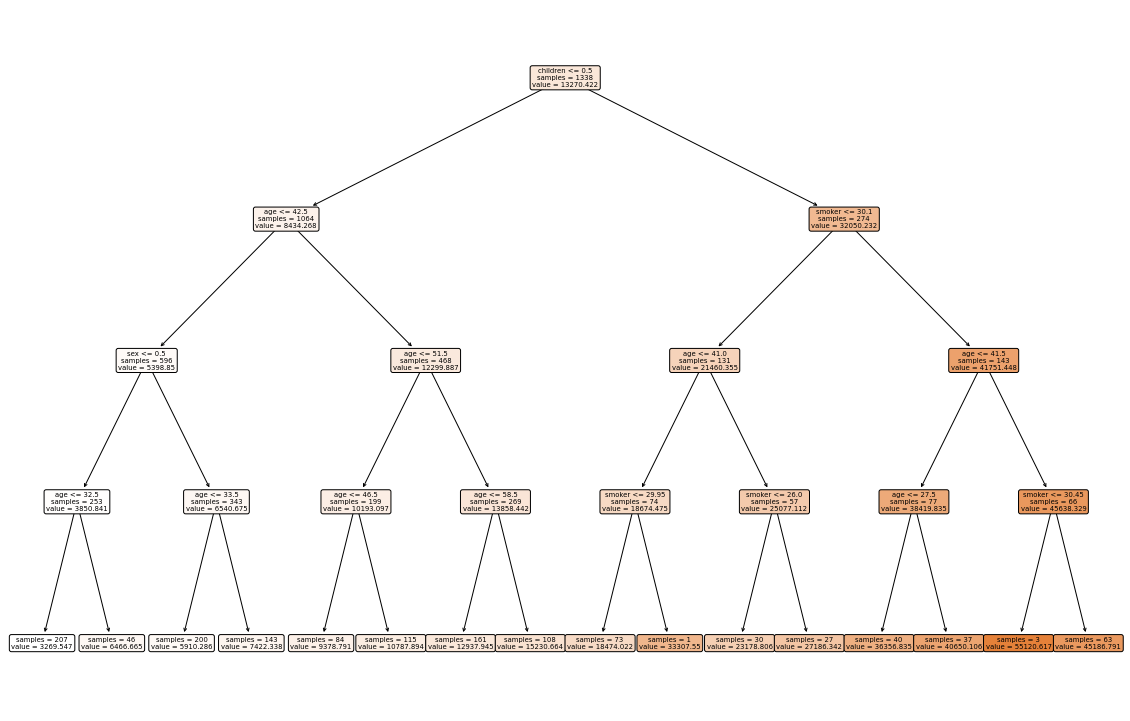

In [ ]:
from sklearn import tree
#Building Tree Model
DTree = tree.DecisionTreeRegressor(max_depth=4)
DTree.fit(X,y)

##Plotting the trees
from sklearn.tree import plot_tree
plt.figure(figsize=(20,13))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features_1)
plt.show()

_____

#### 3) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest.fit(X_train, y_train)
y_pred3 = random_forest.predict(X_test)

In [ ]:
y_pred_train = random_forest.predict(X_train)
score_train = r2_score(y_train,y_pred_train)
print('R2_score (train): ', score_train)

y_pred_test = random_forest.predict(X_test)
score_test = r2_score(y_test,y_pred_test)
print('R2_score (test): ', score_test)


R2_score (train):  0.8820980491513284
R2_score (test):  0.8939951907646618


In [ ]:
y_pred3

array([12283.46607309, 10365.24387041, 43835.64737695, 14143.55239981,
       10907.45970987,  7253.69110032,  2572.61805473, 12554.2184603 ,
        7115.27379194,  6428.60480388,  7030.23210361, 12697.23644122,
        8798.70884404,  5827.93405274, 21213.40478786, 11859.48752921,
       14004.66116494,  5413.49555301,  7072.23460135, 35218.28094069,
       24075.98840715, 14449.9831147 , 12182.86267659, 27570.05614767,
        3062.28964481,  6255.47960657,  6556.63036291,  7379.54182143,
        4900.80030867, 10386.76765964,  7333.65755467, 46499.10746314,
       14236.83996098, 12021.04326434, 16736.72694369,  4973.00913141,
        9824.07750897, 37805.36583843, 42212.39776543,  3046.60606363,
        7238.70786961,  4964.67771956, 19808.25786027, 46415.88445437,
       36935.44589675,  5882.8318527 , 11875.01325117,  7033.29633583,
        6015.11284122, 12617.87187469,  4208.41005416,  7007.69379094,
       27268.03701597, 46728.75573344, 12080.66067168,  5368.99223052,
      

In [ ]:
Importances = random_forest.feature_importances_

In [ ]:
import numpy as np

<Figure size 900x750 with 0 Axes>

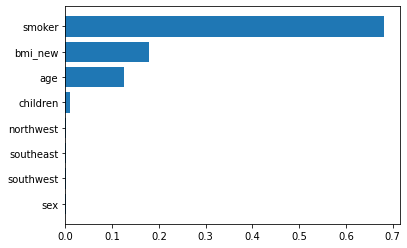

In [ ]:
indices = np.argsort(Importances)
plt.figure(figsize=(6,5),dpi=150)
fig, ax = plt.subplots()
ax.barh(range(len(Importances)), Importances[indices])
ax.set_yticks(range(len(Importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.show()

**Observation** :- In random Forest we can see that smoker predictor has more importance in the model followed by bmi_new.

_____

#### 4) Boosting

###### 1) GBM Model

In [ ]:
import time
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing

In [ ]:
boost_model=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, verbose=1)
##fitting the gradient boost Regressor
start_time = time.time()
boost_model.fit(X_train,y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1   120304034.5950            0.16s
         2   101592447.1847            0.15s
         3    86422065.6640            0.14s
         4    74107062.4540            0.21s
         5    64105820.4193            0.20s
         6    55981666.7796            0.19s
         7    49368250.0798            0.18s
         8    43993869.3058            0.19s
         9    39610907.6970            0.19s
        10    36042013.5369            0.19s
        20    21960662.8076            0.13s
        30    19440228.5077            0.10s
        40    18510664.3598            0.08s
        50    17769765.8738            0.07s
        60    17013304.7944            0.05s
        70    16450760.5339            0.04s
        80    16054566.4565            0.03s
        90    15626230.4830            0.01s
       100    15321540.2546            0.00s
Time taken by GBM 0.1280200481414795 Seconds


In [ ]:
# prediction on the train data
pred_train = random_forest.predict(X_train)
Boost_score_train = r2_score(y_train,pred_train)
print('Boost_train_score (train): ', Boost_score_train)

# Prediction on the test data
pred_test = random_forest.predict(X_test)
Boost_score_test = r2_score(y_test,pred_test)
print('Boost_test_score (train): ', Boost_score_test)

Boost_train_score (train):  0.8820980491513284
Boost_test_score (train):  0.8939951907646618


_ _ _ _

###### 2) **XGB Model**

In [ ]:
import xgboost as xg
from xgboost.sklearn import XGBRegressor
XGB_model = XGBRegressor(objective = "reg:linear" , n_estimators = 10)
fitted_model = XGB_model.fit(X_train,y_train)

[06:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("The train accuracy = " , fitted_model.score(X_train,y_train))
print("The test accuracy ="  , fitted_model.score(X_test , y_test))

The train accuracy =  0.5919434078462478
The test accuracy = 0.6460133551317313


______

#### 5) **Bagging**

In [ ]:
# Bagging Model
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Bagging_Model=BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
Bagging_Model.fit(X_train,y_train)
bagging_predict_test=Bagging_Model.predict(X_train)
print("Bagging Model train accuracy = " , Bagging_Model.score(X_train,y_train))
print("Bagging Model test accuracy = " , Bagging_Model.score(X_test,y_test))

Bagging Model train accuracy =  0.736390410067729
Bagging Model test accuracy =  0.7988649561557809


______

**Conclusion** :- We can see that among all that model 'GBM' model is performing best. it has almost 89% R^2 value

First applied linear regression model then get R^2 value is about 75% , but there were some non impactful variables in the model . After that new model builded with all impactful variables means by checking p value and vif factor so R^2 value get is still same. So there was need to do feature enginearing step. that is one_hot_encoding in this case . because there is a one column called as 'region' it needs that.

After one_hot_encoding new model was builded i.e linear regression with all impactful variables then we get little bit increased score .After that builded decision tree model by decision tree model get R^2 score is about 84%. and at last In GBM model we get good R^2 value is about 89%.